# Source: https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/

In [1]:
%run commonAutoenCode

Loaded the images of dataset-Triangle

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 40, 40)]          0         
_________________________________________________________________
sequential (Sequential)      (None, 100)               160100    
_________________________________________________________________
sequential_1 (Sequential)    (None, 40, 40)            161600    
Total params: 321,700
Trainable params: 321,700
Non-trainable params: 0
_________________________________________________________________
None


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

In [3]:
history = autoencoder.fit(x=X_train, y=X_train, epochs=5,
                validation_data=[X_test, X_test])

Train on 18000 samples, validate on 2000 samples
Epoch 1/5
18000/18000 [==============================] - 17s 924us/sample - loss: 0.0175 - accuracy: 0.0474 - val_loss: 0.0111 - val_accuracy: 0.0439
Epoch 2/5
18000/18000 [==============================] - 9s 486us/sample - loss: 0.0093 - accuracy: 0.0398 - val_loss: 0.0085 - val_accuracy: 0.0388
Epoch 3/5
18000/18000 [==============================] - 8s 460us/sample - loss: 0.0075 - accuracy: 0.0355 - val_loss: 0.0071 - val_accuracy: 0.0340
Epoch 4/5
18000/18000 [==============================] - 9s 501us/sample - loss: 0.0065 - accuracy: 0.0320 - val_loss: 0.0063 - val_accuracy: 0.0316
Epoch 5/5
18000/18000 [==============================] - 10s 530us/sample - loss: 0.0058 - accuracy: 0.0286 - val_loss: 0.0058 - val_accuracy: 0.0277


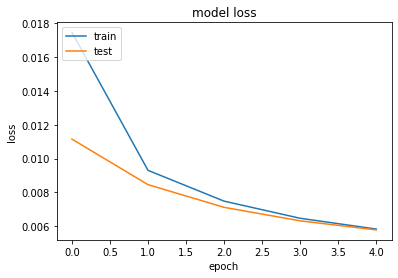

In [4]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

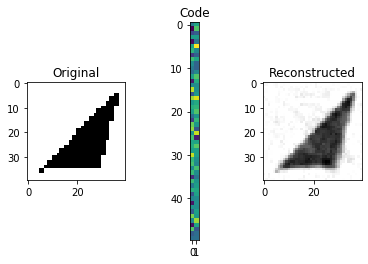

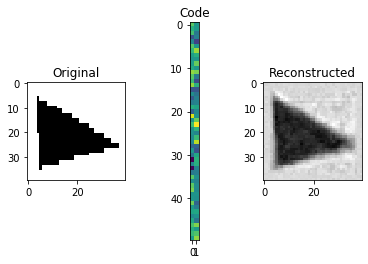

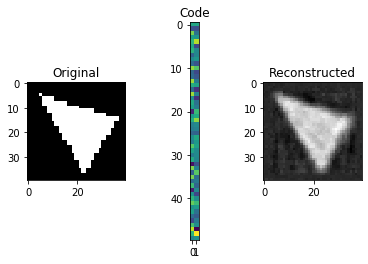

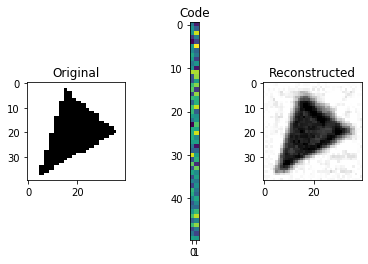

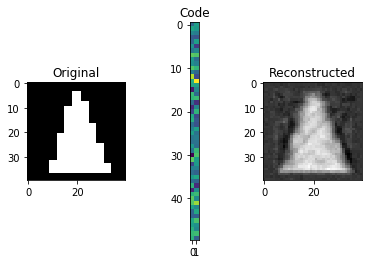

In [5]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()
    
for i in range(5):
    img = X_test[i]
    visualize(img,encoder,decoder)

In [7]:
# encoder.save('encoder.h5')
# decoder.save('decoder.h5')
encoder.save_weights('encoder_weights.h5')
decoder.save_weights('decoder_weights.h5')

# Interactive Decoder

In [7]:
%matplotlib widget
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

plt.ion()
plt.plot()
img = X[0]
code = encoder.predict(img[None])[0]
def plot_func(val1,val2,val3,val4,val5,val6):
    tmpcode = np.copy(code)
    tmpcode[0] = val1
    tmpcode[1] = val2
    tmpcode[2] = val3
    tmpcode[3] = val4
    tmpcode[4] = val5
    tmpcode[5] = val6
    reco = decoder.predict(tmpcode[None])[0]
    plt.imshow(np.clip(reco + 0.5, 0, 1),cmap='gray')

# interact(plot_func, val1 = widgets.FloatSlider(value=0, min=-2, 
# max=2,step=0.1))
interact(plot_func, 
         val1 = widgets.FloatSlider(value=code[0],min=-2,max=2),
         val2 = widgets.FloatSlider(value=code[1],min=-2,max=2),
         val3 = widgets.FloatSlider(value=code[2],min=-2,max=2),
         val4 = widgets.FloatSlider(value=code[3],min=-2,max=2),
         val5 = widgets.FloatSlider(value=code[4],min=-2,max=2),
         val6 = widgets.FloatSlider(value=code[5],min=-2,max=2),
        )

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=1.032270073890686, description='val1', max=2.0, min=-2.0), FloatSlider…

<function __main__.plot_func(val1, val2, val3, val4, val5, val6)>

# Gaussian Noise

In [ ]:
def apply_gaussian_noise(X, sigma=0.1):
    noise = np.random.normal(loc=0.0, scale=sigma, size=X.shape)
    return X + noise

In [ ]:
code_size = 100

# We can use bigger code size for better quality
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size=code_size)

inp = Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = Model(inp, reconstruction)
autoencoder.compile('adamax', 'mse')

for i in range(25):
    print("Epoch %i/25, Generating corrupted samples..."%(i+1))
    X_train_noise = apply_gaussian_noise(X_train)
    X_test_noise = apply_gaussian_noise(X_test)

    # We continue to train our model with new noise-augmented data
    autoencoder.fit(x=X_train_noise, y=X_train, epochs=1,
                    validation_data=[X_test_noise, X_test])

In [ ]:
X_test_noise = apply_gaussian_noise(X_test)
for i in range(5):
    img = X_test_noise[i]
    visualize(img,encoder,decoder)